<a href="https://colab.research.google.com/github/sharna33/CSE_4106_Digital-Image-Processing/blob/main/CSE_4106_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date: 07.07.2025

## **Mounting Drive & Import Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Libraries**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

## **Image Load**

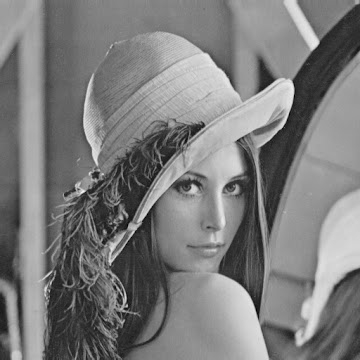

In [ ]:
image = '/content/drive/MyDrive/Colab Notebooks/CSE 4106/LAB 2/lena_gray.jpg'
img = cv2.imread(image)
cv2_imshow(img)

## **Nagative Image**   
A negative image is just the inverted version of a normal image. In grayscale images:

Each pixel has a brightness value from 0 (black) to 255 (white).

A negative flips that brightness:

* Black becomes white,
* White becomes black,
* Dark gray becomes light gray, etc.   

If a pixel value is I, then its negative is calculated as:
`Negative = L - 1 - I`   
Where:
* L = 256 for 8-bit images (0–255),
* L - 1 = 255, so the formula becomes 255 - I.


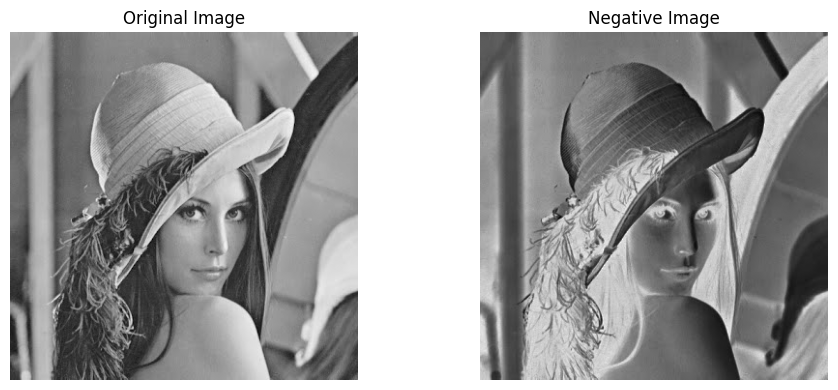

In [ ]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rows, cols = gray_image.shape          # Gets the number of rows and columns (i.e., image height--rows and width--cols) of the grayscale image.
input_image = np.zeros((rows, cols))   # Creates an empty 2D NumPy array of zeros with the same size as the grayscale image.

L = 255
for i in range(rows):
    for j in range(cols):
        input_image[i, j] = L - 1 - gray_image[i, j]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(input_image, cmap='gray')
plt.title("Negative Image")

plt.tight_layout()
plt.show()

## **Log Transformation**  
Log transformation is used to:
* Enhance dark regions of an image,
* Compress bright values, so details in bright areas don’t dominate.

It’s especially useful when:
* Image has very high contrast,
* Most pixels are dark but a few are very bright.   

Formula:
`Output pixel = c⋅log(1+Input pixel)`  

Where:
* `log` is the natural logarithm,
* `1+` ensures we don’t get log(0),
* `c` is a scaling constant so the final image fits within the 0–255 range.   

**Code:**  

1. `c = 255 / np.log(1 + np.max(gray))`  
Calculates the scaling constant c for log transformation.
* np.max(gray) gets the brightest pixel in the grayscale image.
* This makes sure that after applying log, the max output is scaled to 255.    

2. `log_image = c * np.log(1 + gray.astype(np.float32))`   
Applies log transformation to each pixel.
* Converts pixel values to float32 so that logarithm works correctly (log of integers isn’t good).
* Adds 1 to avoid log(0).
* Multiplies the result with c to normalize values into 0–255.  

3. `log_image = np.array(log_image, dtype=np.uint8)`  
Converts the transformed image back into an 8-bit image (i.e., pixel values 0–255). This is needed to display the image properly.



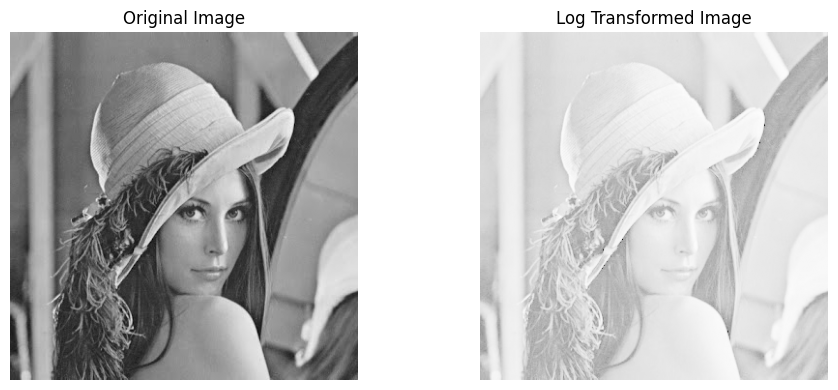

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

c = 255 / np.log(1 + np.max(gray))
log_image = c * np.log(1 + gray.astype(np.float32))

log_image = np.array(log_image, dtype=np.uint8)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(gray, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(log_image, cmap='gray')
plt.title("Log Transformed Image")

plt.tight_layout()
plt.show()

## **Gamma Correction**  
Gamma correction is used to adjust the brightness of an image in a non-linear way.  

**💡 Why do we use Gamma Correction?**  
Human eyes don’t perceive brightness linearly. For example: A pixel with value 100 does not look half as bright as one with 200.  

Gamma correction helps:
* Brighten dark areas (when gamma < 1)
* Darken bright areas (when gamma > 1)  
* No change (when gamma = 1)    

**Formula:** $$
s = c \cdot r^{\gamma}
$$
This brightens or darkens the image depending on gamma.

**Code:**    
1. `normalized = gray / 255.0`  
Normalizes the grayscale image values to be between 0 and 1 (because gamma correction works best on normalized data).
For example, pixel value 128 becomes 128/255 ≈ 0.5.  

2. `gamma_corrected = np.uint8(gamma_corrected * 255)`  
Converts the corrected image:
* Back to pixel range [0, 255]
* Converts it to 8-bit unsigned integers for display




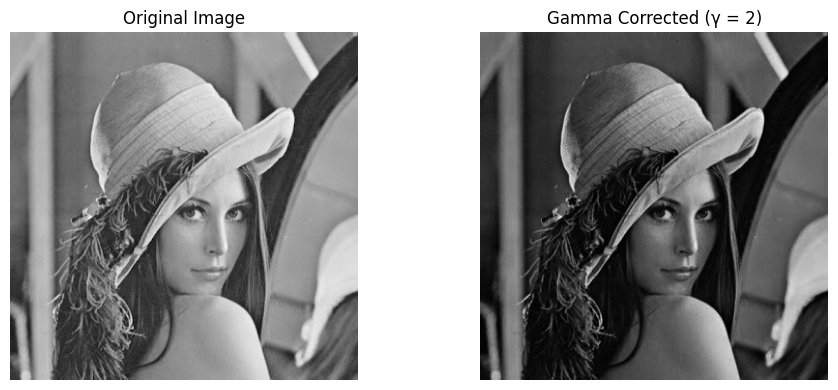

In [ ]:
normalized = gray / 255.0

gamma = 2  # Try 0.5, 1.0, 2.0 etc.
gamma_corrected = np.power(normalized, gamma)
gamma_corrected = np.uint8(gamma_corrected * 255)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(gray, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f"Gamma Corrected (γ = {gamma})")

plt.tight_layout()
plt.show()

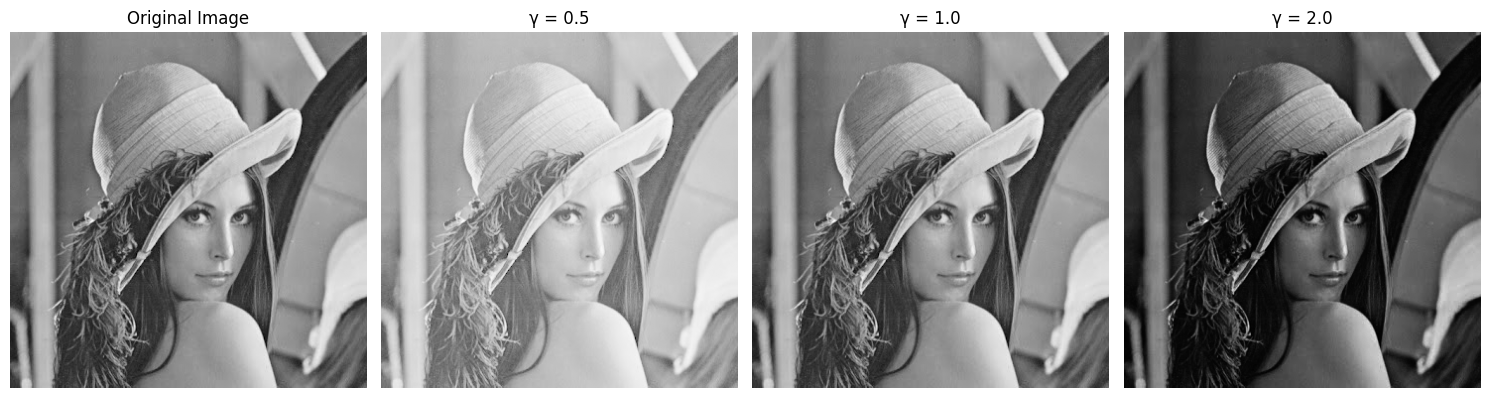

In [ ]:
normalized = gray / 255.0

gamma_values = [0.5, 1.0, 2.0]

plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.axis('off')
plt.imshow(gray, cmap='gray')
plt.title("Original Image")

for i, gamma in enumerate(gamma_values):
    gamma_corrected = np.power(normalized, gamma)
    gamma_corrected = np.uint8(gamma_corrected * 255)

    plt.subplot(1, 4, i + 2)
    plt.axis('off')
    plt.imshow(gamma_corrected, cmap='gray')
    plt.title(f"γ = {gamma}")

plt.tight_layout()
plt.show()

# plt.figure(figsize=(12, 8))

# plt.subplot(2, 2, 1)
# plt.hist(gray.flatten(), bins=256, range=[0, 256], alpha=0.7, color='blue')
# plt.title("Original Histogram")
# plt.xlabel("Pixel Intensity")
# plt.ylabel("Frequency")

# for i, gamma in enumerate(gamma_values):
#     gamma_corrected = np.power(normalized, gamma)
#     gamma_corrected = np.uint8(gamma_corrected * 255)

#     plt.subplot(2, 2, i + 2)
#     plt.hist(gamma_corrected.flatten(), bins=256, range=[0, 256], alpha=0.7)
#     plt.title(f"Histogram γ = {gamma}")
#     plt.xlabel("Pixel Intensity")
#     plt.ylabel("Frequency")

# plt.tight_layout()
# plt.show()

## **Thresholding**

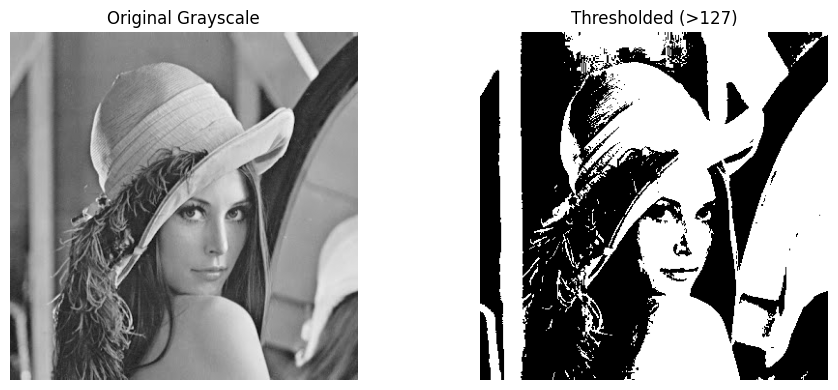

In [ ]:
threshold_value = 127

_, binary = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(binary, cmap='gray')
plt.title(f"Thresholded (>{threshold_value})")

plt.tight_layout()
plt.show()

## **Contrast Stretching**

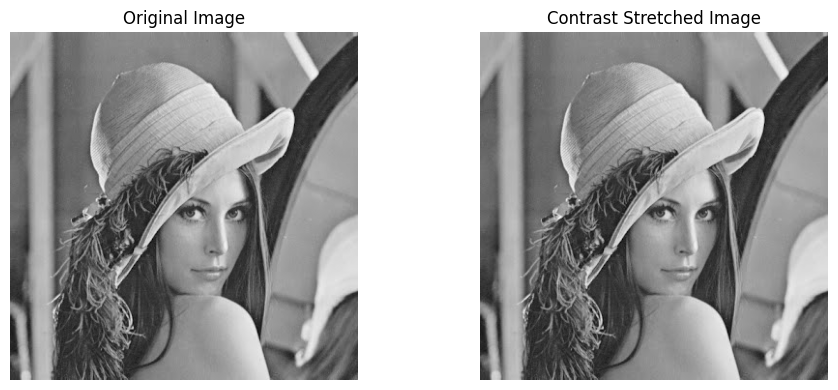

In [ ]:
r_min = np.min(gray)
r_max = np.max(gray)

# Apply contrast stretching using the formula
contrast_stretched = ((img - r_min) / (r_max - r_min)) * 255
contrast_stretched = contrast_stretched.astype(np.uint8)

# Show the original and contrast-stretched images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(gray, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(contrast_stretched, cmap='gray')
plt.title("Contrast Stretched Image")

plt.tight_layout()
plt.show()